# model comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"14_15_RL_agent_TDlearn_output"

file_see_colors = "11_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_numbers = "12_RL_agent_TDlearn_output/models_evaluation.csv"
file_see_colors_and_numbers = "13_RL_agent_TDlearn_output/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)
df_see_colors_and_numbers.head(3)

,participants,best_alpha,best_beta,BIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,07_11_2024_17_23_43,0.186570,7.920431,250.672654,0.800000,0.753247,0.878788,0.724638,0.811189,0.359975,0.199605
1,08_11_2024_13_03_29,0.227935,7.920431,252.584196,0.840741,0.841463,0.890323,0.773913,0.865204,0.344682,0.348668
2,11_11_2024_16_46_44,0.186570,7.920431,237.986217,0.866667,0.839161,0.902256,0.832117,0.869565,0.394001,0.466550


# BIC and R2 calculations

In [3]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

delta_mcFadden_r2_see_colors_see_numbers = mcFadden_r2_see_colors - mcFadden_r2_see_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_colors = mcFadden_r2_see_colors - mcFadden_r2_sees_colors_and_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_numbers = mcFadden_r2_see_numbers - mcFadden_r2_sees_colors_and_numbers



# visualizations

Saved: 14_15_RL_agent_TDlearn_output/models_evaluation_comparison.pdf


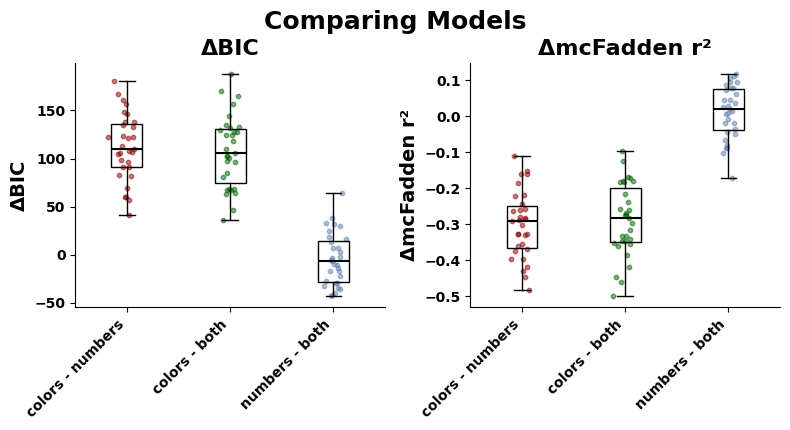

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

bic_deltas = [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers]
mcFadden_r2_deltas = [delta_mcFadden_r2_see_colors_see_numbers, delta_mcFadden_r2_see_colors_and_numbers_see_colors, delta_mcFadden_r2_see_colors_and_numbers_see_numbers]

bic_labels = ["colors - numbers", "colors - both", "numbers - both"]
mcFadden_labels = ["colors - numbers", "colors - both", "numbers - both"]

box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, tick_labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

box_mcFadden = axs[1].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, tick_labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')

scatter_colors = ['#8b0000', '#006400', '#5e81ac']

for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

for i, delta in enumerate(mcFadden_r2_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axs:
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

axs[0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
axs[1].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Comparing Models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()
